In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
def normalise(df):
    return (df - df.min()) / (df.max() - df.min())

### Using new case numbers to predict number of healthcare workers infected on same day.

In [3]:
df = pd.read_csv("data/new_daily_cases.csv")
df = df.drop([0])
df = normalise(df)

X = np.column_stack((np.array(df['ConfirmedCovidCases']), np.array(df['HospitalisedCovidCases']), np.array(df['RequiringICUCovidCases'])))
#X = np.array(df['HospitalisedCovidCases']).reshape(-1, 1)
y = np.array(df['HealthcareWorkersCovidCases'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

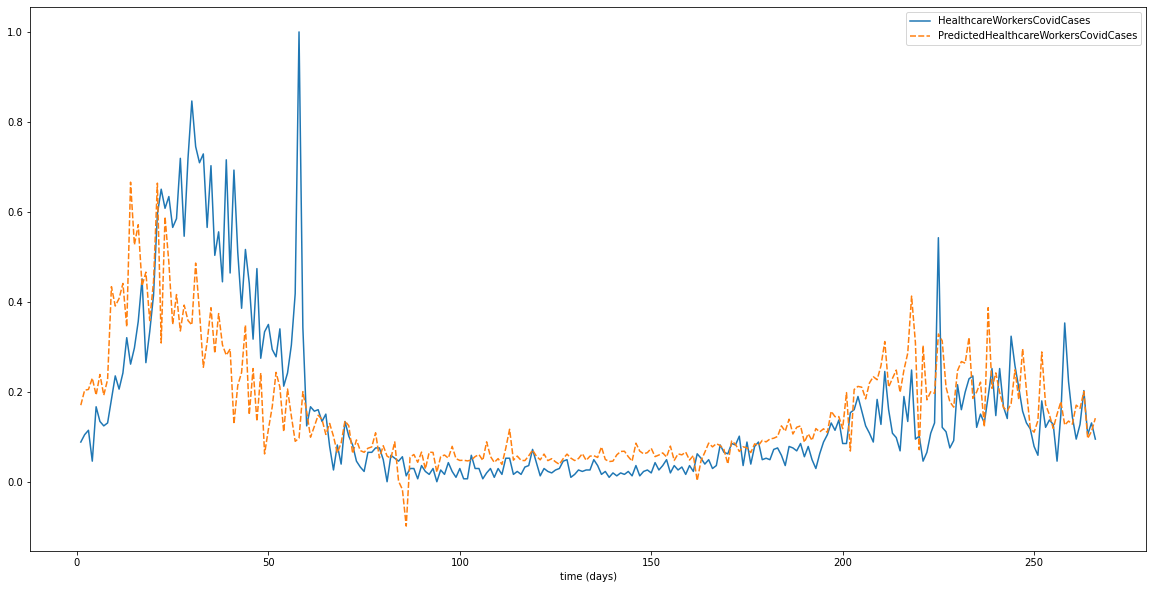

In [5]:
df_new = pd.DataFrame()
df_new['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases']
df_new['PredictedHealthcareWorkersCovidCases'] = y_pred

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_new)
plt.legend()
plt.xlabel('time (days)')
plt.show()

### Using new case numbers from previous $n$ days to predict healthcare worker cases.